This notebook visualizes the results for each data set in the folder 'data'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import Birch as Birch_cluster
from sklearn.metrics import roc_curve

from BirchEnsemble import BirchEnsemble
from Model import Model
from Dataset import Dataset
import time
import json
import Birch
from utils import plot_images, plot_scatterplots
from Birch import get_od_data, get_birch_models, get_birch_configs, get_heuristic_values, calculate_T_values, plot_false_pos, T_average_nn, T_average, store_models, load_models, get_top_anoms
from main import od_and_plot, compare_birch_configs, plot_histograms

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# small synthetic

In [31]:
from os.path import join as p_join
from os.path import abspath
from pathlib import Path 
PROJDIR = abspath('')
PROJDIR
DATA = p_join(PROJDIR, 'data')
DATA_S = p_join(DATA, 'synthetic_small')

(array([1.]), array([4], dtype=int64))


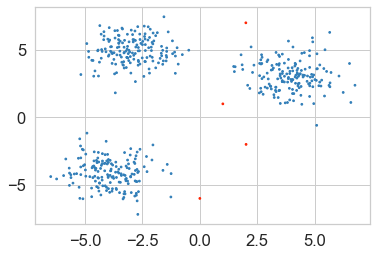

In [4]:
data_r = np.loadtxt(p_join(DATA_S,'syn_data_shuffled.dat'))#p_join(DATA_M,)
X = data_r[:,0:2]
od_labels = data_r[:,2]
data_s = Dataset(X, od_labels)#, labels)
print(np.unique(data_s.od_labels[data_s.od_labels==1], return_counts=True))

colors = np.array(['#317eb8'] * len(data_s.X))
colors[np.where(data_s.od_labels==1)] = '#ff2200'
plt.scatter(data_s.X[:,0], data_s.X[:,1], s=3.0, color=colors)

## BIRCH ensembles

50.0


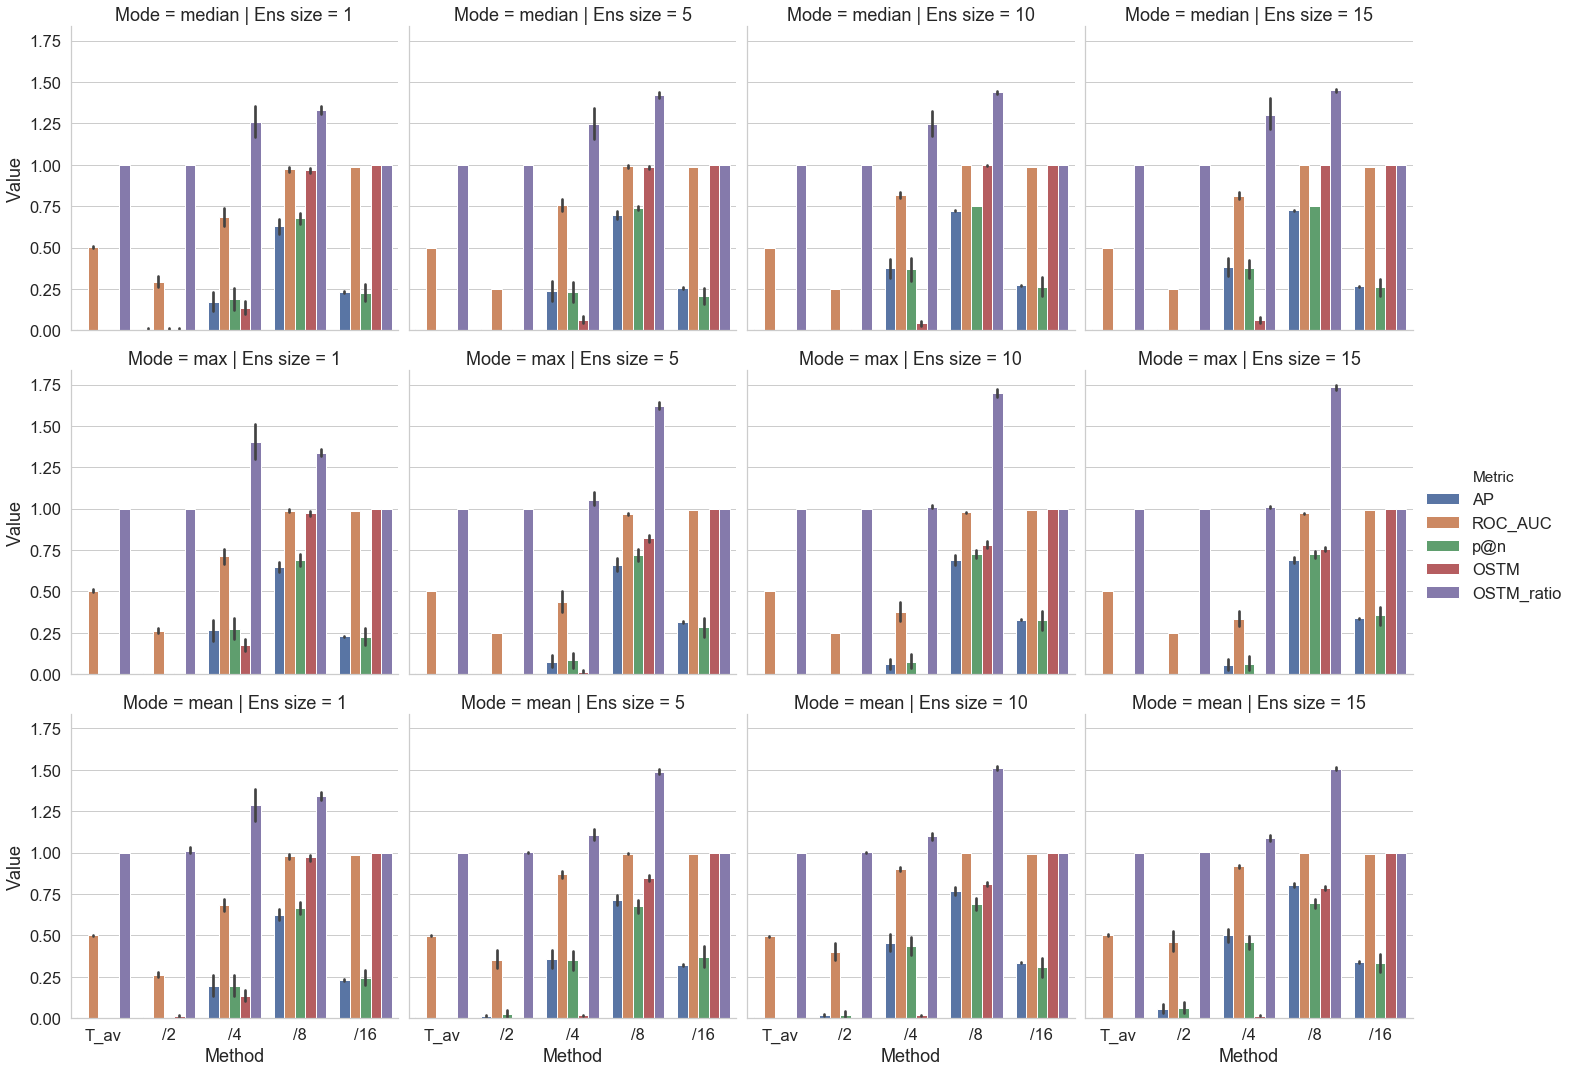

In [5]:
df_heuristic = pd.read_csv(p_join(DATA_S, 'BEE_syn_data_heuristic.csv'))
print(len(df_heuristic)/(3*5*4*5))
sns.catplot(x='Method', y='Value', data=df_heuristic, hue='Metric', row='Mode', col='Ens size', kind='bar')

### BEE

50.0


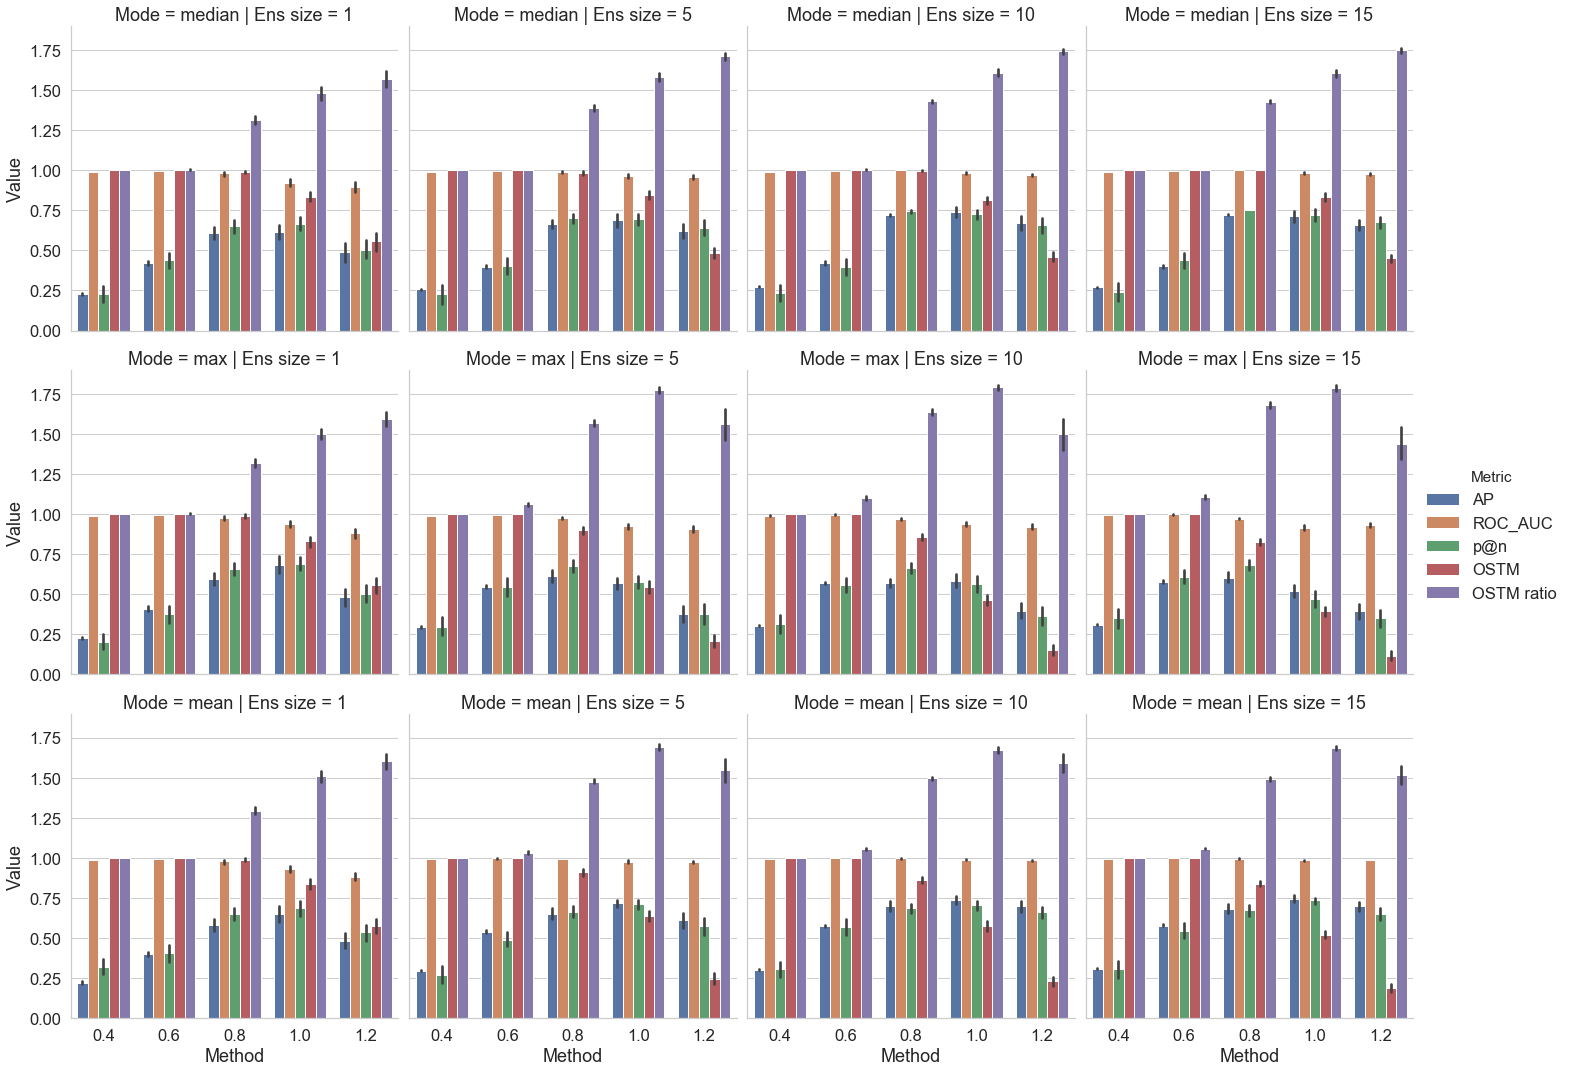

In [6]:
df_fixed = pd.read_csv(p_join(DATA_S, 'BEE_syn_data_fixed.csv'))
print(len(df_fixed)/(3*5*4*5))
sns.catplot(x='Method', y='Value', data=df_fixed, hue='Metric', row='Mode', col='Ens size', kind='bar')

### BEM

50.0 trials


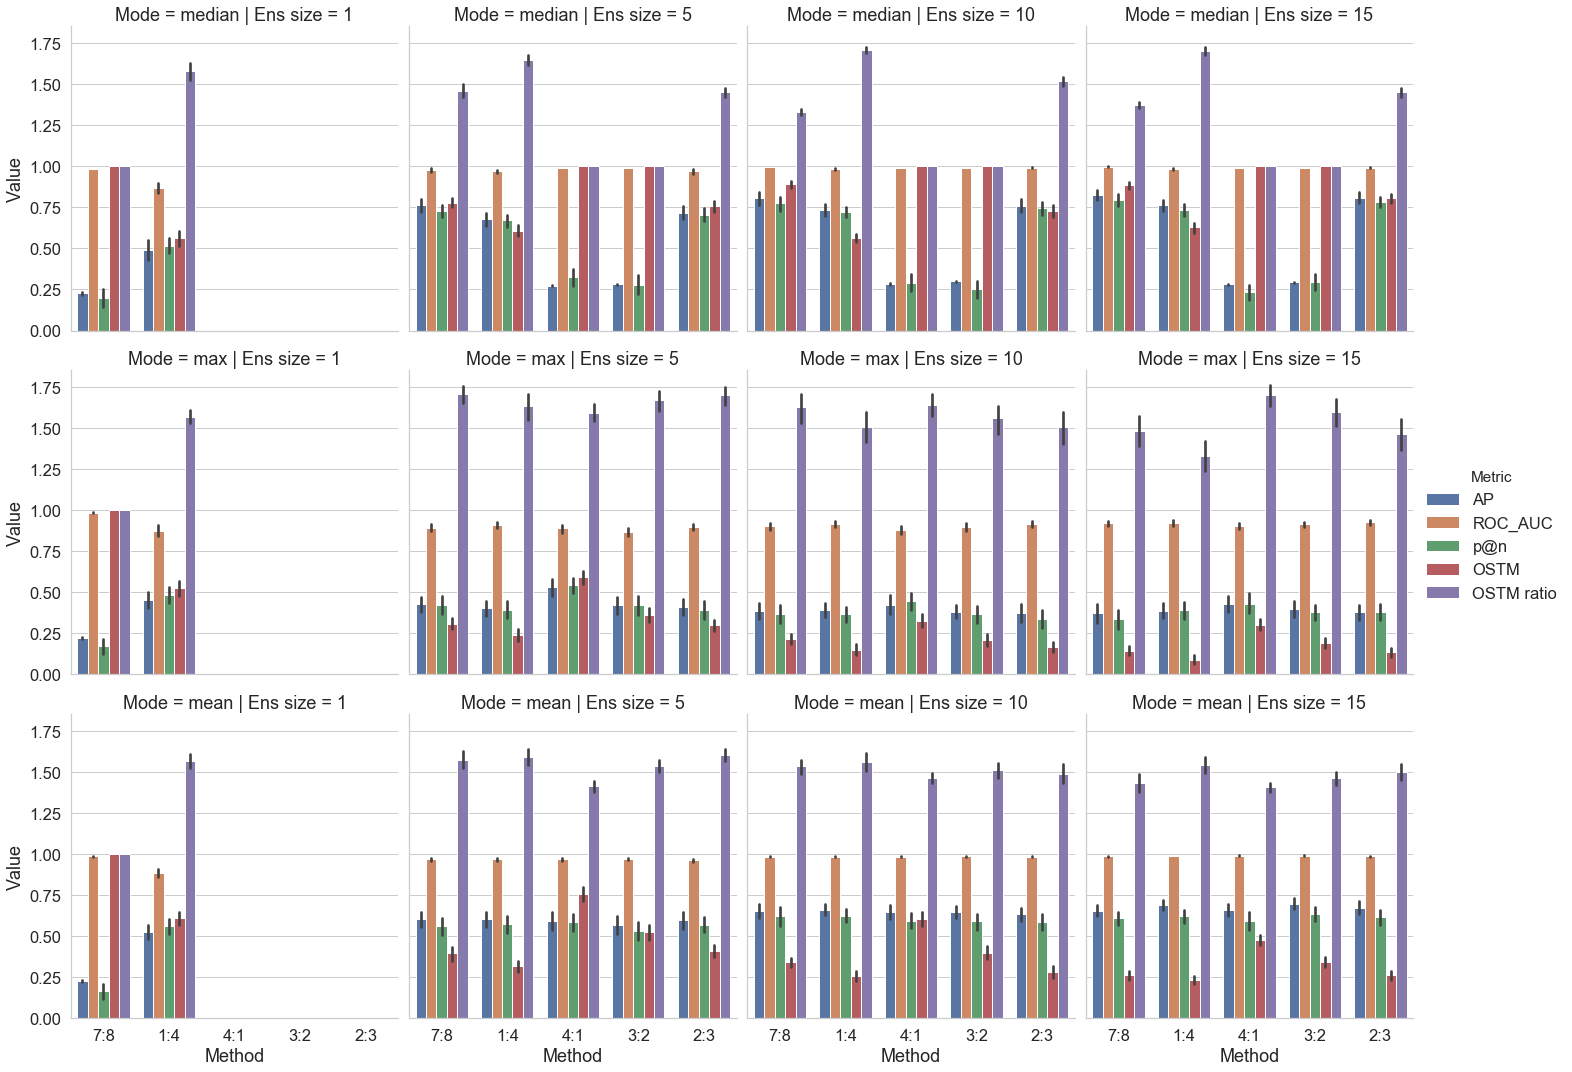

In [7]:
df_bem = pd.read_csv(p_join(DATA_S, 'BEM_syn_data_3.csv'))
print(len(df_bem)/((5*3+2)*3*5),'trials')
sns.catplot(x='Method', y='Value', data=df_bem, hue='Metric', row='Mode', col='Ens size', kind='bar')

50.0 trials


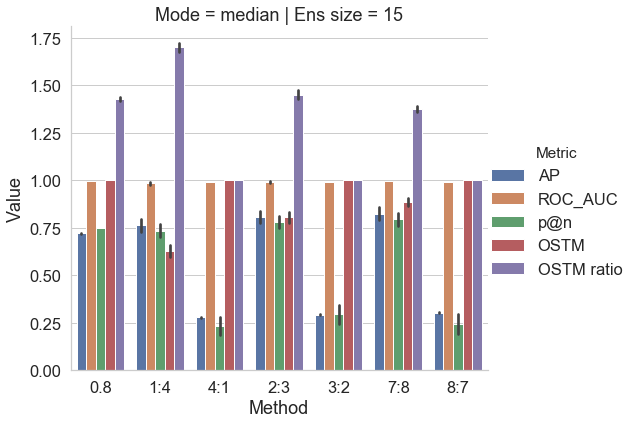

In [8]:
df_bem_15 = pd.read_csv(p_join(DATA_S, 'bem_data_median15.csv'))
print(len(df_bem_15)/(5*7),'trials')
sns.catplot(x='Method', y='Value', data=df_bem_15, hue='Metric', row='Mode', col='Ens size', order=['0.8','1:4','4:1','2:3','3:2','7:8','8:7'], height=6,aspect=1.2, kind='bar')

# mnist 
benign: 1,7, malign: 0, contamination:0.01, size: 15.000

In [21]:
DATA_MB = p_join(DATA, 'big_mnist')

## BIRCH ensembles

20.0 trials


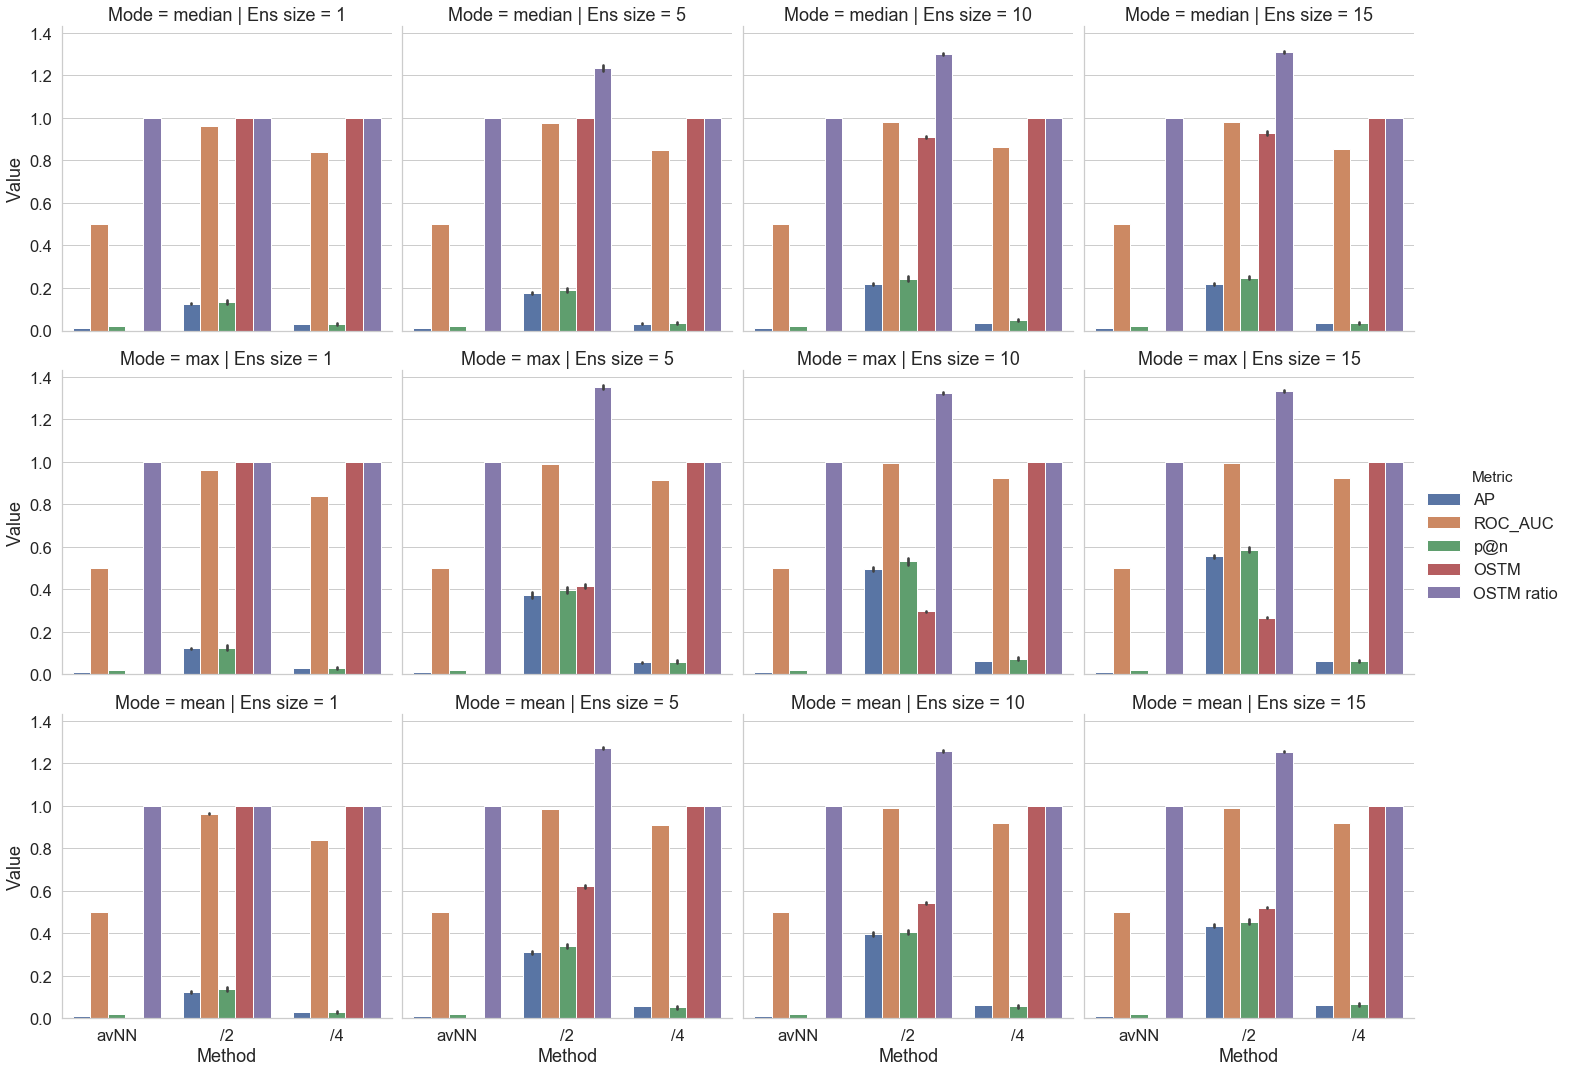

In [22]:
df_heuristic = pd.read_csv(p_join(DATA_MB, 'heuristic_BEE.csv'))
print(len(df_heuristic)/(3*3*4*5), 'trials')
sns.catplot(x='Method', y='Value', data=df_heuristic, hue='Metric', row='Mode', col='Ens size', kind='bar')

20.0 trials


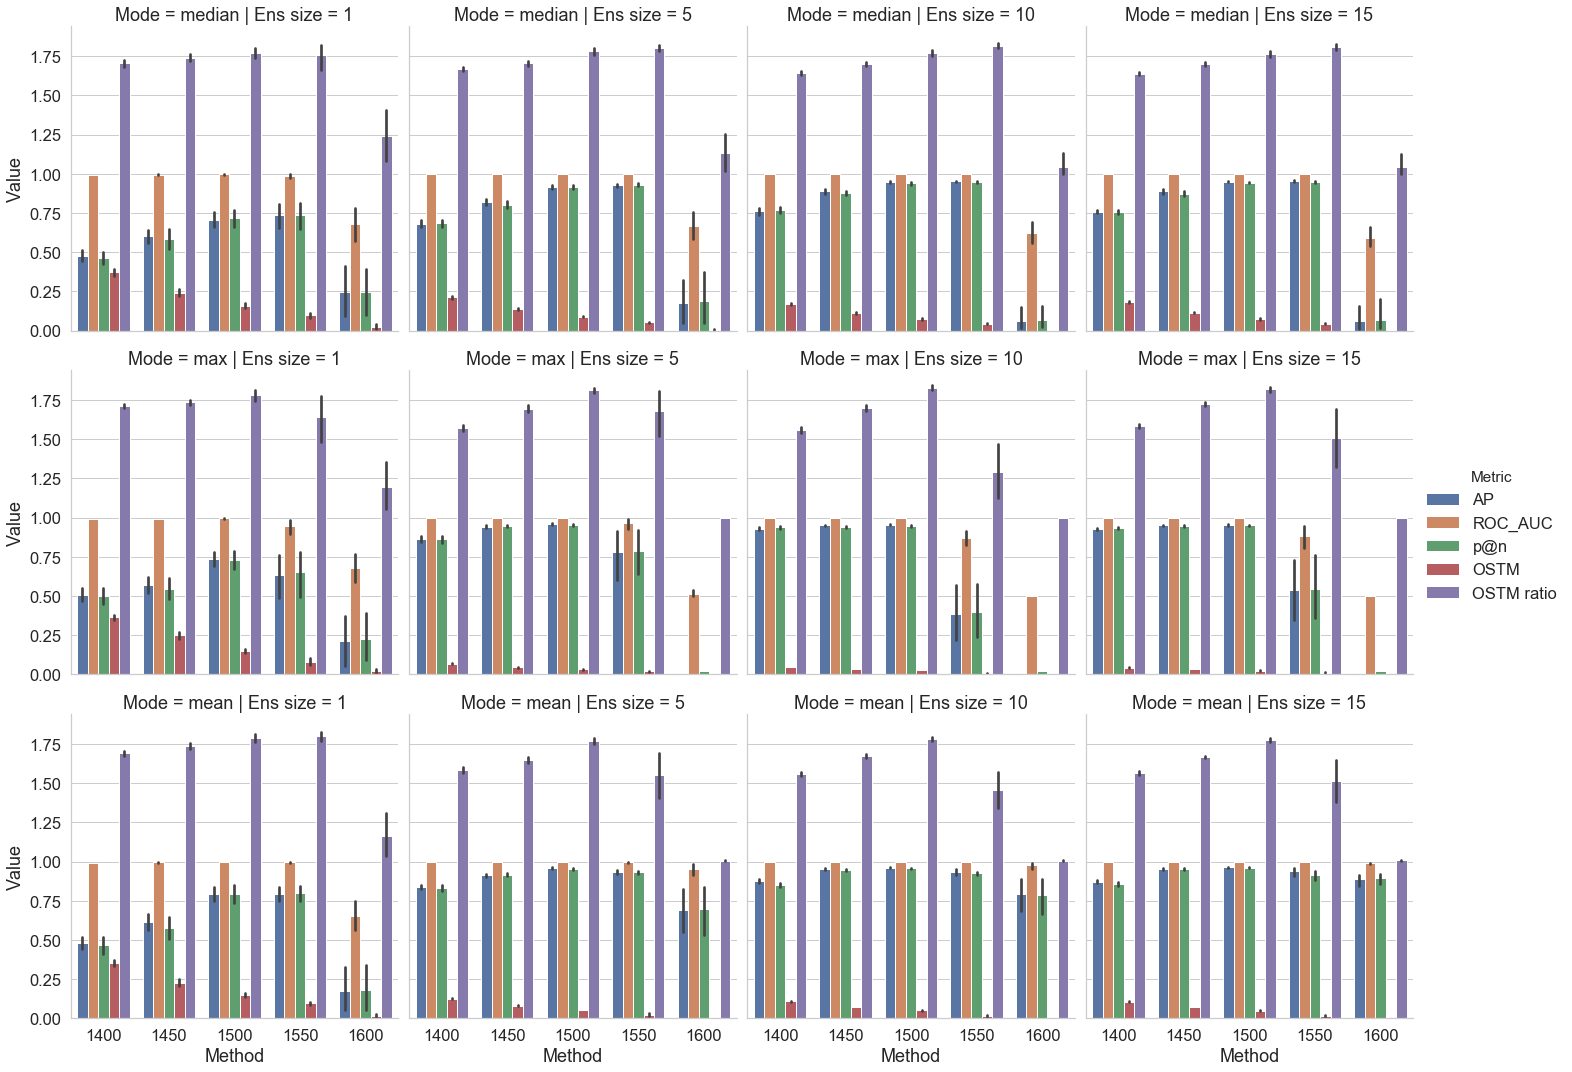

In [23]:
df_fixed = pd.read_csv(p_join(DATA_MB, 'fixed_BEE.csv'))
print(len(df_fixed)/(3*5*4*5), 'trials')
sns.catplot(x='Method', y='Value', data=df_fixed, hue='Metric', row='Mode', col='Ens size', kind='bar')

## OCSVM

In [24]:
df_ocsvm = pd.read_csv(p_join(DATA_MB, 'ocsvm_final.csv'))

In [25]:
g = np.unique(df_ocsvm.gamma.values)
print(g)
df_ocsvm = df_ocsvm.replace(g[4:], np.round(g[4:],7))
df_ocsvm = df_ocsvm.replace(g[:4], np.round(g[:4],9))

[1.00e-08 4.60e-08 2.15e-07 1.00e-06 4.60e-06 2.15e-05 1.00e-04]


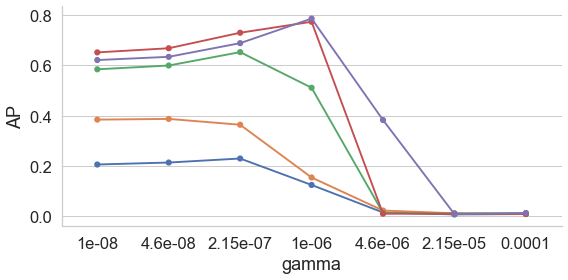

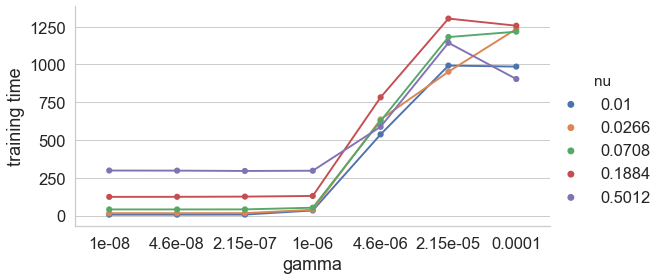

In [26]:
g=sns.catplot(x='gamma', y='AP', data=df_ocsvm, hue='nu', legend=False, kind='point', height=4, scale=0.7,  aspect= 2.0)
plt.show()

g=sns.catplot(x='gamma', y='train_time', data=df_ocsvm, hue='nu', kind='point', height=4, scale=0.7, aspect= 2.0)
g.set_axis_labels("gamma", "training time")
for lh in g._legend.legendHandles: 
    lh._sizes = [30] 
plt.show()

## isolation forest

In [27]:
df_isofor = pd.read_csv(p_join(DATA_MB, 'isofor_final.csv'))

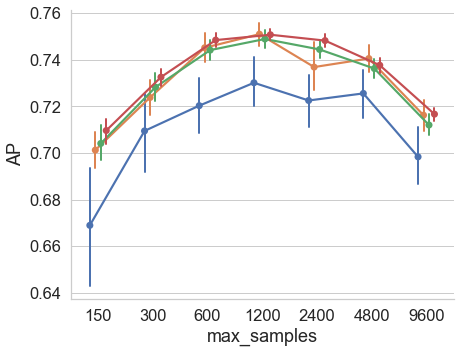

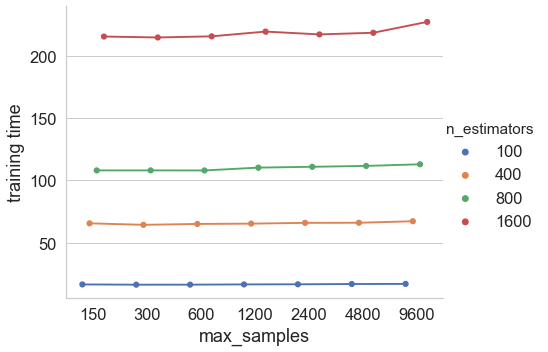

In [28]:
g=sns.catplot(x='max_samples', y='AP', data=df_isofor, hue='n_estimators', dodge=0.3, legend=False, scale=0.8, errwidth=2.0, aspect=1.3,kind='point')

g=sns.catplot(x='max_samples', y='train_time', data=df_isofor, hue='n_estimators', dodge=0.4, aspect=1.3, scale=0.7,kind='point')
for lh in g._legend.legendHandles: 
    lh._sizes = [30] 
g.set_axis_labels("max_samples", "training time")

## Compare

load models from C:\Users\Theresa\Documents\BA\gitcode\Bachelorthesis\data\big_mnist\compare_models_short.txt
BE15 1500 mn train time: 11.822216599996318
BE1 1500 mn train time: 0.6916342349970364
OCSVM train time: 92.59090150999546
isoFor 400 train time: 85.4104068599947
isoFor 1600 train time: 341.78419851500075


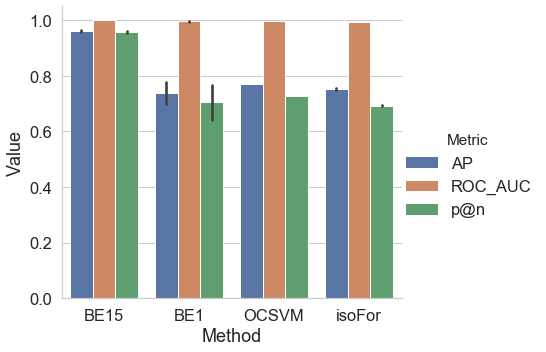

In [29]:
df_compare_mb = pd.read_csv(p_join(DATA_MB, 'compare.csv'))
df = df_compare_mb[(df_compare_mb['Metric'] != 'OSTM') & (df_compare_mb['Metric'] != 'OSTM ratio') & (df_compare_mb['Method'] != 'BE15 1500 md') & (df_compare_mb['Method'] != 'isoFor 400')]
df = df.replace('isoFor 1600', 'isoFor')
df = df.replace('BE15 1500 mn', 'BE15')
df = df.replace('BE1 1500 mn', 'BE1')

g=sns.catplot(x='Method', y='Value',hue='Metric', data=df, aspect=1.2, kind='bar')

Models_mb = load_models(p_join(DATA_MB, 'compare_models_short.txt'))
for M in Models_mb:
    print(M.name, 'train time:', M.fit_time)

# large synthetic data set
n=500.000 anomalies = 20

In [32]:
DATA_V = p_join(DATA, 'synthetic_500000')

## BIRCH ensembles

10.0 trials


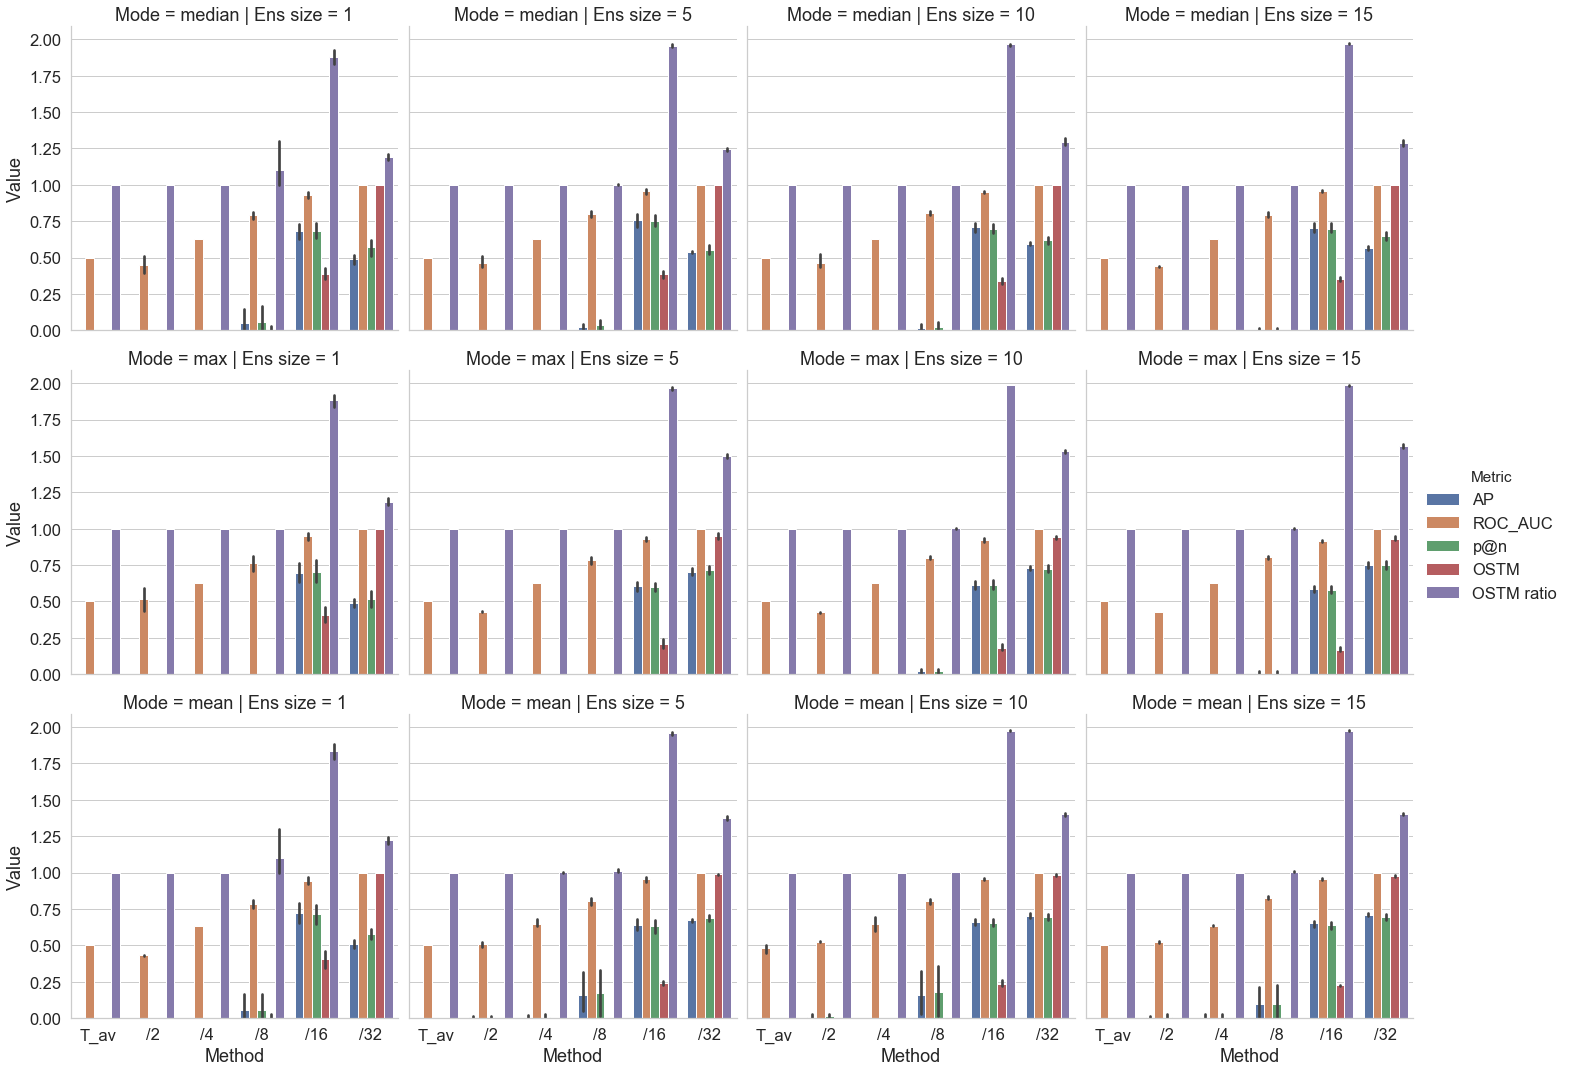

In [35]:
df_heuristic = pd.read_csv(p_join(DATA_V, 'BEE_heuristic.csv'))
print(len(df_heuristic)/(3*6*4*5), 'trials')
sns.catplot(x='Method', y='Value', data=df_heuristic, hue='Metric', row='Mode', col='Ens size', kind='bar')

20.0 trials


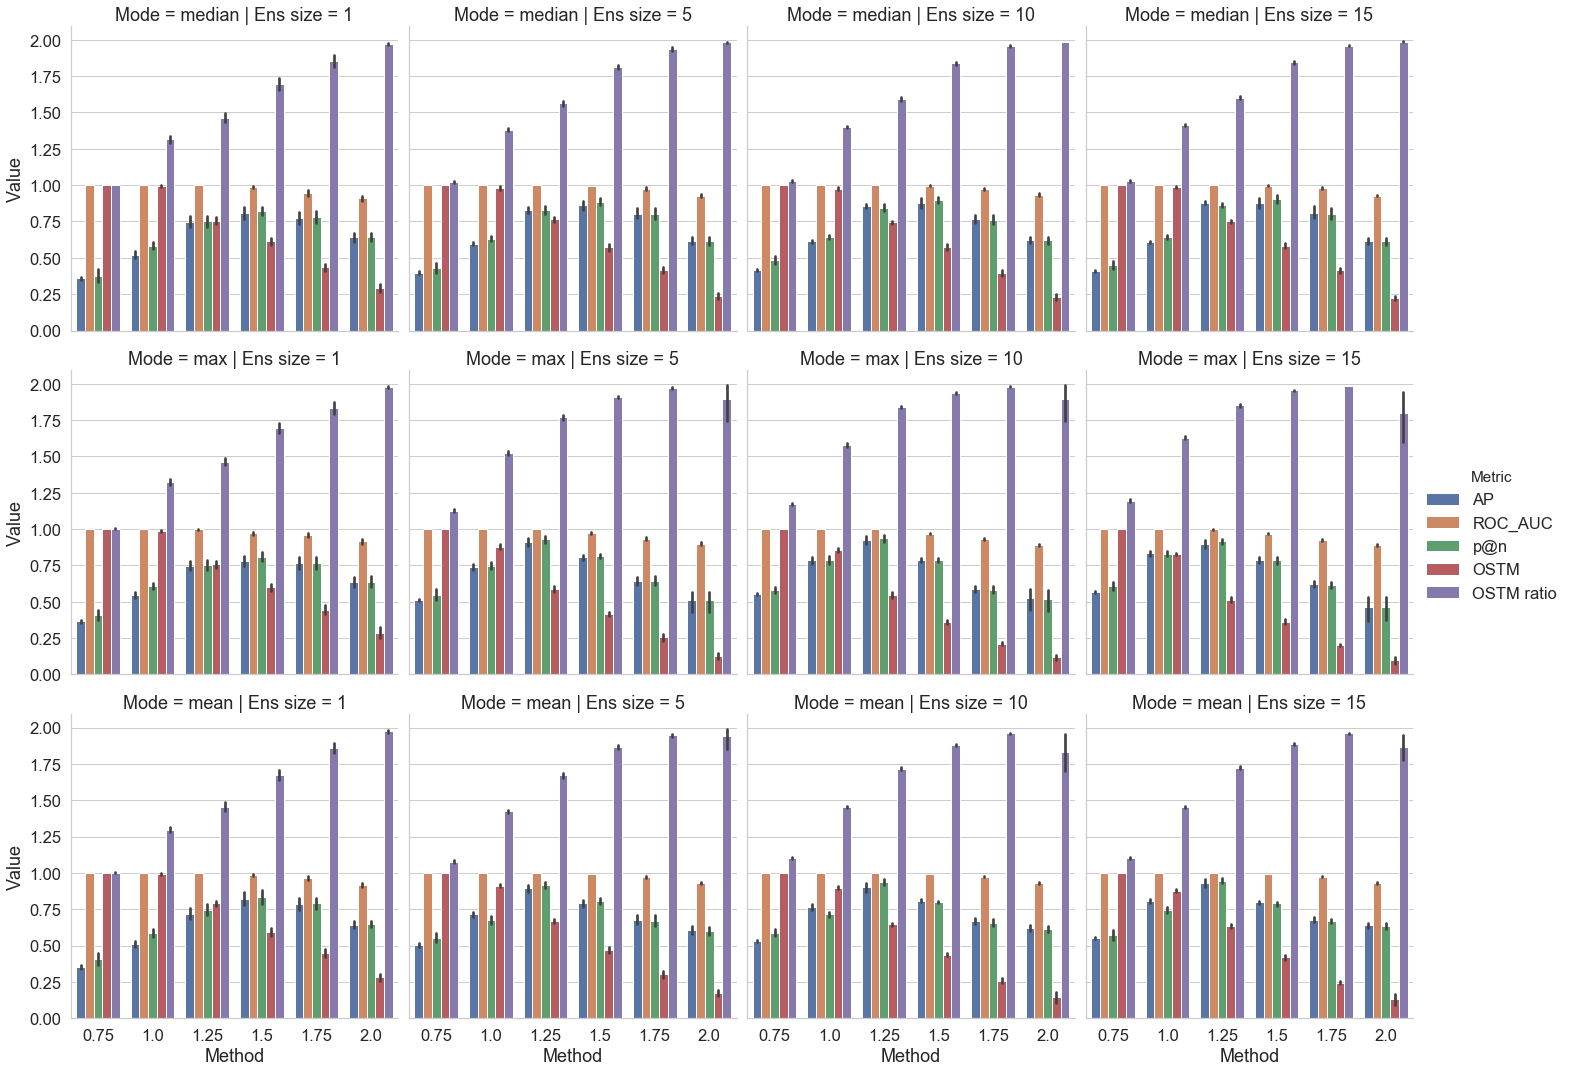

In [36]:
df_fixed = pd.read_csv(p_join(DATA_V, 'BEE_fixed.csv'))
print(len(df_fixed)/(3*6*4*5), 'trials')
sns.catplot(x='Method', y='Value', data=df_fixed, hue='Metric', row='Mode', col='Ens size', kind='bar')

## OCSVM

In [37]:
df_ocsvm_big = pd.read_csv(p_join(DATA_V,'ocsvm.csv'))
g = np.unique(df_ocsvm_big.nu.values)
df_ocsvm_big = df_ocsvm_big.replace(g, np.round(g,5))
g = np.unique(df_ocsvm_big.gamma.values)
df_ocsvm_big = df_ocsvm_big.replace(g[:4], np.round(g[:4],4))
g = np.unique(df_ocsvm_big.gamma.values)
df_ocsvm_big = df_ocsvm_big.replace(g[4:], np.round(g[4:],4))

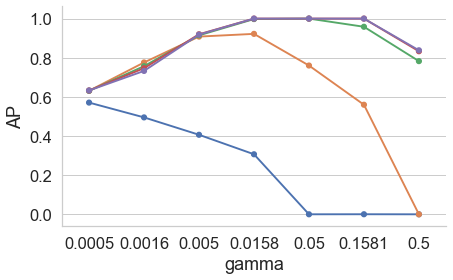

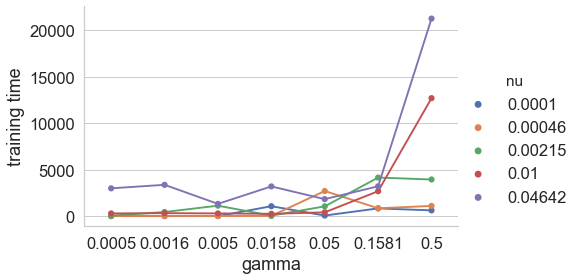

In [38]:
g=sns.catplot(x='gamma', y='AP', data=df_ocsvm_big, hue='nu', kind='point', height=4, scale=0.7, legend=False, aspect= 1.6)
plt.show()

g=sns.catplot(x='gamma', y='train_time', data=df_ocsvm_big, hue='nu', kind='point', height=4, scale=0.7, aspect= 1.7)
g.set_axis_labels("gamma", "training time")
for lh in g._legend.legendHandles: 
    lh._sizes = [30] 
plt.show()

## isolation forest

In [39]:
df_if_syn = pd.read_csv(p_join(DATA_V,'isofor_final.csv'))

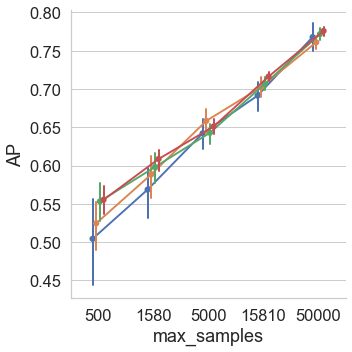

In [40]:
g=sns.catplot(x='max_samples', y='AP', data=df_if_syn, hue='n_estimators', dodge=0.2, errwidth=2.0, legend=False, scale=0.7,kind='point')
plt.show()

[100 177 316 562]
[  500  1580  5000 15810 50000]


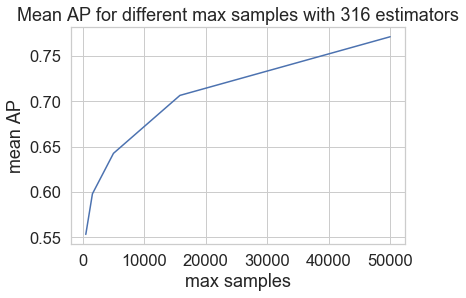

In [41]:
x = np.unique(df_if_syn[df_if_syn['max_samples']==50000]['n_estimators'])
print(x)
n_e = len(x)
y = np.unique(df_if_syn[df_if_syn['n_estimators']==316]['max_samples'])
print(y)
m_s = len(y)
a =  np.mean(df_if_syn[df_if_syn['n_estimators']==316]['AP'].values.reshape(m_s,20), axis=1)
plt.plot(y, a)
plt.title('Mean AP for different max samples with 316 estimators')
plt.xlabel('max samples')
plt.ylabel('mean AP')
plt.show()

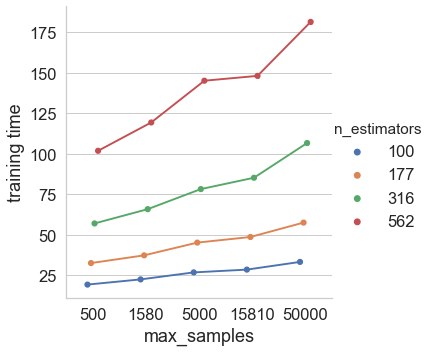

In [42]:
g=sns.catplot(x='max_samples', y='train_time', data=df_if_syn, hue='n_estimators', dodge=0.2, scale=0.7,kind='point')
g.set_axis_labels("max_samples", "training time")
for lh in g._legend.legendHandles: 
    lh._sizes = [30] 
plt.show()

## Compare

In [43]:
df_compare_v = pd.read_csv(p_join(DATA_V, 'compare.csv'))

In [44]:
df_compare_v.Method = df_compare_v.Method.replace('OCSVM 0.01', 'OCSVM1')
df_compare_v.Method = df_compare_v.Method.replace('OCSVM 0.002', 'OCSVM2')
df_compare_v.Method = df_compare_v.Method.replace('BE15 1.25 mn', 'BE15')
df_compare_v.Method = df_compare_v.Method.replace('BE1 1.25 mn', 'BE1')

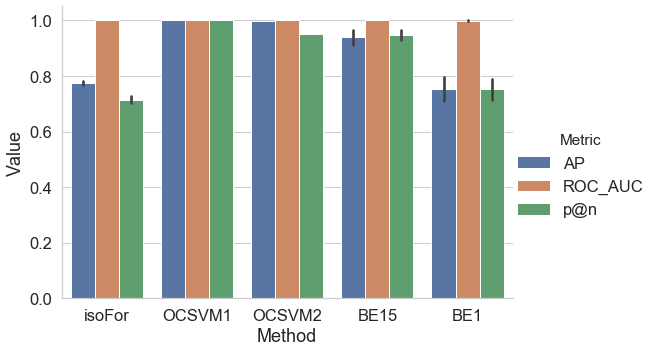

In [45]:
g=sns.catplot(x='Method', y='Value', hue='Metric', data=df_compare_v[(df_compare_v['Metric']!='OSTM ratio') & (df_compare_v['Metric']!='OSTM')& (df_compare_v['Method']!='BE10 1.25 mn')], kind='bar', aspect=1.5)
plt.show()

In [46]:
models = load_models(p_join(DATA_V, 'compare_models_short.txt'))
for M in models:
    print(M.name, M.fit_time)

load models from C:\Users\Theresa\Documents\BA\gitcode\Bachelorthesis\data\synthetic_500000\compare_models_short.txt
isoFor 238.1394972850103
OCSVM 0.01 175.20720757499802
OCSVM 0.002 47.455205795000076
BE10 1.25 mn 200.7916487299779
BE15 1.25 mn 258.4606892599957
BE1 1.25 mn 15.156936355010838
